[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/MultiNEAs/blob/main/examples/multimin_tutorial.ipynb)

# MultiNEAs: The `multimin` Module Tutorial

This notebook demonstrates how to use the `multineas.multimin` module for handling multidimensional distributions, specifically designed for asteroid population analysis.

## Installation

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -U multineas
except ImportError:
    print("Not running in Colab, skipping installation")

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiNEAs.git

Not running in Colab, skipping installation


## Load the Package

Import `multineas.multimin` and other required libraries:

In [2]:
import pandas as pd
import numpy as np
import multineas.multimin as mm
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
from multineas.util import Util, Stats
from multineas.plot import CornerPlot

Read data:

In [5]:
df_neas=pd.read_json("data/nea_extended.json.gz")
df_neas["q"]=df_neas["a"]*(1-df_neas["e"])
data_neas=np.array(df_neas[["q","e","i"]])

Transform to unbound:

In [6]:
scales=[1.35,1.00,180.0]
udata=np.zeros_like(data_neas)
for i in range(len(data_neas)):
    udata[i]=Util.tIF(data_neas[i],scales,Util.f2u)

Corner plot of data:

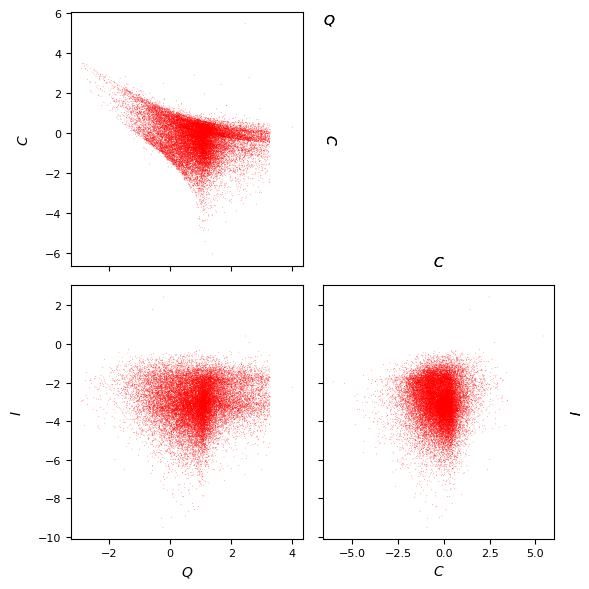

In [7]:
properties=dict(
    Q=dict(label=r"$Q$",range=None),
    E=dict(label=r"$C$",range=None),
    I=dict(label=r"$I$",range=None),
)
G=CornerPlot(properties,figsize=3)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatterPlot(udata,**sargs)


You can also make a 2-D histogram:

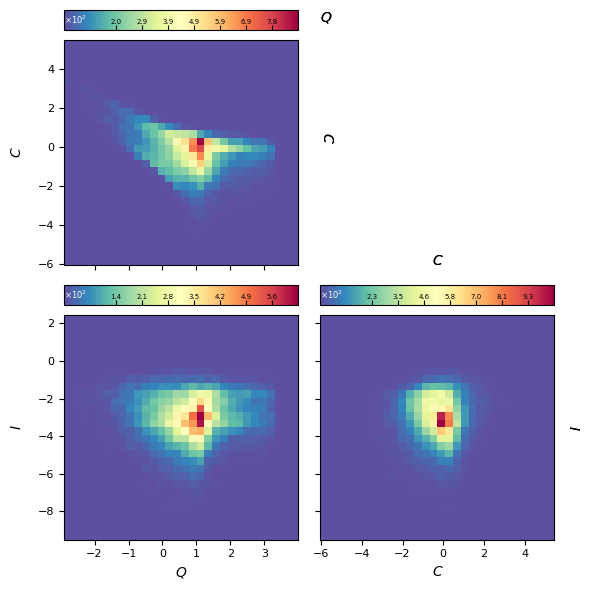

In [8]:
G=CornerPlot(properties,figsize=3)
hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plotHist(udata,colorbar=True,**hargs)

Create a *Composed multinormal*:

In [9]:
CMND=mm.ComposedMultiVariateNormal(Ngauss=1,Nvars=2)
print(CMND)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 2 random variables:
    Weights: [1.0]
    Number of variables: 2
    Averages (μ): [[0, 0]]
    Standard deviations (σ): [[1.0, 1.0]]
    Correlation coefficients (ρ): [[0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (6):
            [p1,μ1_1,μ1_2,Σ1_11,Σ1_12,Σ1_22]
            [1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
        With std. and correlations (6):
            [p1,μ1_1,μ1_2,σ1_1,σ1_2,ρ1_12]
            [1.0, 0.0, 0.0, 1.0, 1.0, 0.0]


Generate a sample:

In [10]:
sample = CMND.rvs(10000)

Show sample:

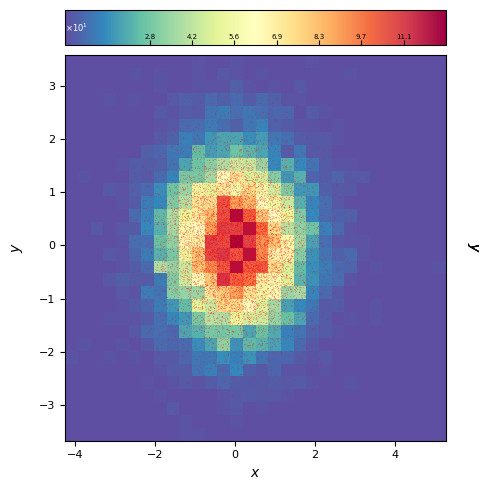

In [11]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
)
G=CornerPlot(properties,figsize=5)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plotHist(sample,colorbar=True,**hargs)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatterPlot(sample,**sargs)


Now create a true *composed distribution*:

You may created specifying each parameter:

In [12]:
weights=[0.1,0.9]
mus=[[0,0],[5,5]]
Sigmas=[[[1,0.2],[0,1]],[[1,0],[0,1]]]
MND=mm.ComposedMultiVariateNormal(mus=mus,weights=weights,Sigmas=Sigmas)
print(MND)

Composition of Ngauss = 2 gaussian multivariates of Nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0, 0], [5, 5]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


Or, you may do it using a flat list of parameters:

In [13]:
params=[0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
MND=mm.ComposedMultiVariateNormal(params=params,Nvars=2)
print(MND)

Composition of Ngauss = 2 gaussian multivariates of Nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0], [5.0, 5.0]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


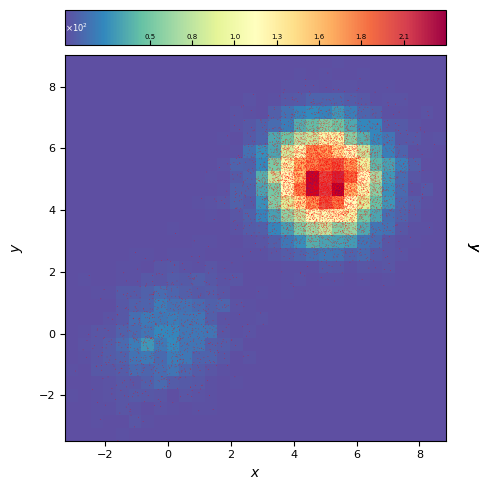

In [14]:
sample = MND.rvs(10000)
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
)
G=CornerPlot(properties,figsize=5)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plotHist(sample,colorbar=True,**hargs)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatterPlot(sample,**sargs)

## Fitting data to a composed multinormal distribution 

Create the fitting object:

In [15]:
F=mm.FitCMND(Ngauss=1,Nvars=3)

The fitting object create a test CMND:

In [16]:
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0, 0, 0]]
    Standard deviations (σ): [[1.0, 1.0, 1.0]]
    Correlation coefficients (ρ): [[0.0, 0.0, 0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
        With std. and correlations (10):
            [p1,μ1_1,μ1_2,μ1_3,σ1_1,σ1_2,σ1_3,ρ1_12,ρ1_13,ρ1_23]
            [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]


Let's make a minimization:

In [17]:
t = Util.elTime(0)
F.fitData(udata,verbose=False,advance=1)
t = Util.elTime()
print(f"-log(L)/N = {F.solution.fun/len(udata)}")

Iterations:
Iter 0:
	Vars: [2.5, 1.7, -1.6, -1.2, -1.1, -1.5, 2.2, 1.7, 1.9]
	LogL/N: 5.482515062156635
Iter 1:
	Vars: [2.5, 1.4, -2.1, -1.3, -1.2, -1.6, 2.1, 1.8, 1.7]
	LogL/N: 5.310789889726747
Iter 2:
	Vars: [2.2, 0.87, -2.3, -1.3, -1.5, -1.7, 1.9, 1.7, 1.5]
	LogL/N: 5.113466450357126
Iter 3:
	Vars: [0.85, -0.51, -3.1, -1.9, -2.1, -1.9, 0.5, 0.78, 0.89]
	LogL/N: 4.370062348684365
Iter 4:
	Vars: [0.84, -0.45, -3, -2.2, -2.2, -2, -0.19, 0.13, 0.47]
	LogL/N: 4.122548379097678
Iter 5:
	Vars: [0.92, -0.37, -3, -2.3, -2.3, -2.1, -0.65, 0.061, -0.0057]
	LogL/N: 4.022401128011559
Iter 6:
	Vars: [0.91, -0.34, -3, -2.3, -2.3, -2.1, -0.68, 0.064, -0.061]
	LogL/N: 4.016488054693319
Iter 7:
	Vars: [0.86, -0.3, -3, -2.3, -2.4, -2.1, -0.71, 0.054, -0.083]
	LogL/N: 4.013715421099718
Iter 8:
	Vars: [0.86, -0.3, -3, -2.3, -2.4, -2.1, -0.71, 0.052, -0.074]
	LogL/N: 4.013578951513318
Iter 9:
	Vars: [0.86, -0.3, -3, -2.3, -2.4, -2.1, -0.71, 0.052, -0.074]
	LogL/N: 4.013578951513318
Elapsed time since la

Now you may see the result:

In [18]:
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0.8613186782566644, -0.2951261196561889, -3.024113027309399]]
    Standard deviations (σ): [[0.8950288462521656, 0.8641833063725712, 1.0749700951164936]]
    Correlation coefficients (ρ): [[-0.3397678420263328, 0.02610874848950706, -0.03708593257100945]]

    Covariant matrices (Σ): 
        [[[0.8010766356234827, -0.2627998888091603, 0.025119990445674326], [-0.2627998888091603, 0.7468127870130293, -0.034451763693387365], [0.025119990445674326, -0.034451763693387365, 1.1555607053947632]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.8613186782566644, -0.2951261196561889, -3.024113027309399, 0.8010766356234827, -0.2627998888091603, 0.025119990445674326, 0.7468127870130293, -0.034451763693387365, 1.1555607053947632]
        With std. and cor

Let's plot the fit result:_

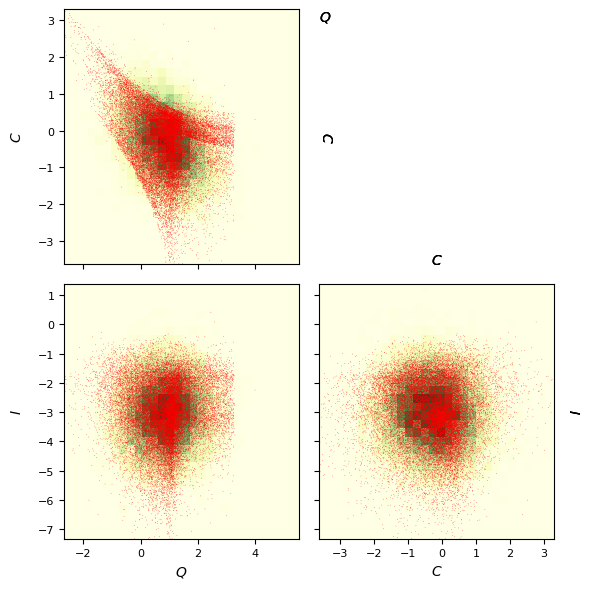

In [19]:
props=["Q","C","I"]
hargs=dict(bins=30,cmap='YlGn')
sargs=dict(s=0.2,edgecolor='None',color='r')
G=F.plotFit(props=props,hargs=hargs,sargs=sargs,figsize=3)

Since a fitting process may be a very long process it is useful to store the result:

In [20]:
F.saveFit(f"products/fit-single.pkl",useprefix=False)

If you have the result you may load it afterwards here or in another notebook:

In [21]:
F=mm.FitCMND(f"products/fit-single.pkl")
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0.8613186782566644, -0.2951261196561889, -3.024113027309399]]
    Standard deviations (σ): [[0.8950288462521656, 0.8641833063725712, 1.0749700951164936]]
    Correlation coefficients (ρ): [[-0.3397678420263328, 0.02610874848950706, -0.03708593257100945]]

    Covariant matrices (Σ): 
        [[[0.8010766356234827, -0.2627998888091603, 0.025119990445674326], [-0.2627998888091603, 0.7468127870130293, -0.034451763693387365], [0.025119990445674326, -0.034451763693387365, 1.1555607053947632]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.8613186782566644, -0.2951261196561889, -3.024113027309399, 0.8010766356234827, -0.2627998888091603, 0.025119990445674326, 0.7468127870130293, -0.034451763693387365, 1.1555607053947632]
        With std. and cor

Let's try with two MND:

Iterations:
Iter 0:
	Vars: [0.5, 0.5, 2.6, 1.8, -1.6, 2.5, 1.7, -1.6, -1.2, -1.1, -1.6, -1.4, -1.2, -1.5, 2.7, 1.7, 2, 1.6, 1.7, 1.7]
	LogL/N: 5.426799049658642
Iter 5:
	Vars: [-1.2, 0.48, 1, -0.29, -3.3, 0.82, -0.31, -2.9, -3.3, -2.8, -2.1, -2.2, -2.2, -2.1, -0.11, 0.44, -0.66, -0.76, 0.041, 0.12]
	LogL/N: 3.9682000280743477
Iter 10:
	Vars: [-1.2, 0.47, 1.2, 0.069, -3.7, 0.65, -0.37, -2.8, -2.4, -3.4, -2.1, -2.4, -2.3, -2.3, -0.78, 0.89, -0.027, -1.1, 0.077, 0.19]
	LogL/N: 3.905112231099651
Iter 15:
	Vars: [-0.43, 0.48, 1.4, 0.02, -3.3, 0.48, -0.43, -2.8, -2.5, -3.2, -2.1, -2.4, -2.2, -2.2, -0.98, 0.83, -0.31, -1.5, 0.032, 0.18]
	LogL/N: 3.874072798667041
Iter 17:
	Vars: [-0.24, 0.48, 1.4, 0.013, -3.3, 0.48, -0.46, -2.8, -2.5, -3.2, -2.1, -2.4, -2.2, -2.2, -0.92, 0.77, -0.3, -1.5, 0.019, 0.2]
	LogL/N: 3.873027386227566
Elapsed time since last call: 3.07424 s
-log(L)/N = 3.873027386227566
Composition of Ngauss = 2 gaussian multivariates of Nvars = 3 random variables:
    Weights: [0.41

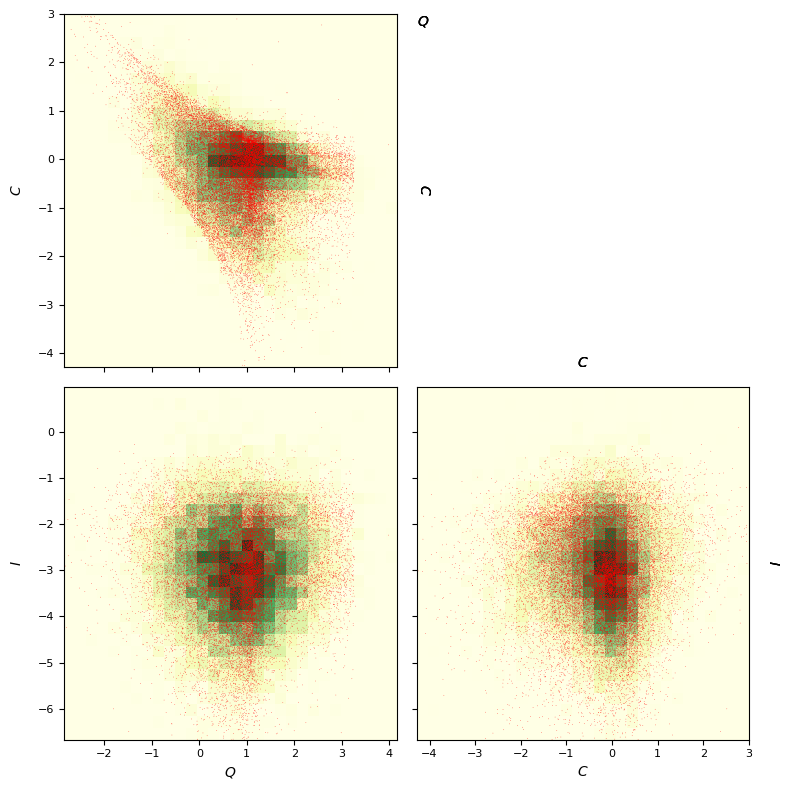

In [22]:
F=mm.FitCMND(Ngauss=2,Nvars=3)

Util.elTime(0)
F.fitData(udata,advance=5)
Util.elTime()
F.saveFit(f"products/fit-multiple.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)

G=F.plotFit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"products/fit-multiple-{F.prefix}.png")

Notice that by using two multinormals you now obtain a better value of the $\log {\cal L}$.

You can also fit setting bounds in parameters to avoid divergences:

Iterations:
Iter 0:
	Vars: [2.2, 2.2, 2.6, 1.8, -1.6, 2.5, 1.7, -1.6, -1.3, -1.1, -1.6, -1.4, -1.2, -1.5, 2.7, 1.7, 2, 1.6, 1.7, 1.7]
	LogL/N: 5.424820534630294
Iter 5:
	Vars: [2.1, 0.85, 1.1, -0.44, -3, 0.5, -0.048, -3.1, -2.5, -2.6, -2.3, -2.3, -2.2, -1.9, -0.029, 0.36, -0.63, -1.2, -0.32, 0.32]
	LogL/N: 3.961435153174314
Iter 10:
	Vars: [1.7, -0.13, 1.2, -0.23, -3, 0.11, -0.16, -3, -2.5, -2.8, -2.2, -2.5, -2, -2, -0.34, 0.32, -0.48, -1.9, -0.31, 0.16]
	LogL/N: 3.9058015702390967
Iter 15:
	Vars: [-0.1, -0.46, 1.3, -0.16, -3.3, 0.35, -0.42, -2.7, -2.5, -2.9, -2.1, -2.4, -2, -2.3, -0.48, 0.69, -0.25, -1.8, -0.068, 0.29]
	LogL/N: 3.8857335749186324
Iter 20:
	Vars: [-1.4, -0.99, 1.4, -0.0069, -3.3, 0.5, -0.48, -2.8, -2.5, -3.1, -2.1, -2.5, -2.2, -2.2, -0.9, 0.79, -0.31, -1.5, -0.0038, 0.24]
	LogL/N: 3.875229773397918
Iter 23:
	Vars: [-1.6, -0.97, 1.4, 0.045, -3.3, 0.53, -0.47, -2.8, -2.5, -3.2, -2.1, -2.4, -2.2, -2.2, -1, 0.81, -0.3, -1.5, 0.027, 0.19]
	LogL/N: 3.8723569871930104
Elapsed

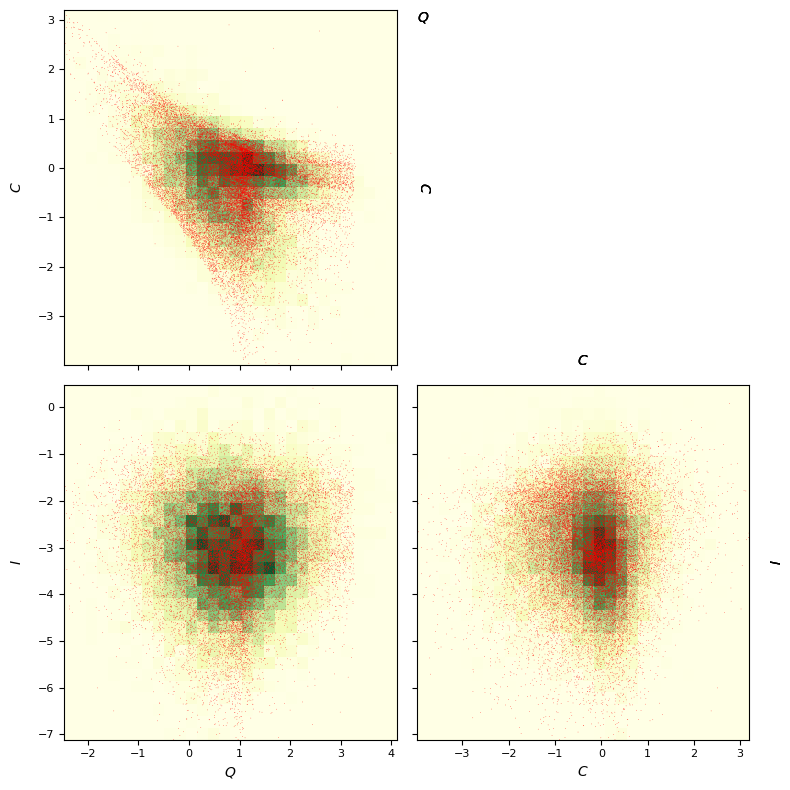

In [23]:
F=mm.FitCMND(Ngauss=2,Nvars=3)
bounds=F.setBounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

Util.elTime(0)
F.fitData(udata,advance=5,bounds=bounds)
Util.elTime()
F.saveFit(f"products/fit-multiple-bounds.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plotFit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"products/fit-multiple-bounds-{F.prefix}.png")

Five gaussians:

Iterations:
Iter 0:
	Vars: [2.2, 2.2, 2.2, 2.2, 2.2, 2.6, 1.8, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.6, 2.5, 1.7, -1.6, 2.5, 1.7, -1.6, -1.3, -1.2, -1.7, -1.4, -1.2, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.5, -1.4, -1.3, -1.4, 3.5, 1.7, 1.9, 2.3, 2.2, 2.1, 1.8, 1.9, 1.9, 1.6, 1.6, 1.8, 1.6, 1.6, 1.6]
	LogL/N: 5.406394477165358
Iter 10:
	Vars: [-0.97, 1.1, 0.14, -0.78, -0.12, 2, 0.028, -2.9, 0.99, -0.54, -2.9, 0.62, 0.38, -3.4, 1.5, -0.93, -3.4, -0.18, -0.31, -2.6, -2.7, -3.6, -2.5, -3.2, -2.8, -2.3, -2.7, -3.2, -2.1, -2.5, -2.5, -1.8, -2.5, -1.9, -2.3, -1, -0.032, 0.7, -0.31, 0.46, -0.46, -1.9, -0.19, 0.23, -0.0011, 1.5, -0.15, -2.7, -0.28, 0.44]
	LogL/N: 3.770311933388413
Iter 18:
	Vars: [-0.18, 0.46, -0.73, -0.95, 0.32, 1.5, 0.091, -3.1, 1, -0.56, -2.8, 0.7, 0.49, -3.5, 1.5, -0.8, -3.6, 0.015, -0.48, -2.6, -2.3, -3.6, -2.4, -3.3, -2.8, -2.3, -2.6, -3.2, -2, -2.4, -2.6, -1.8, -2.5, -2, -2.3, -0.99, 0.51, 0.37, -0.65, 0.63, -0.39, -2.7, -0.053, 0.22, -0.17, 1.7, -0.17, -2.4, -0.17, 0.41]
	

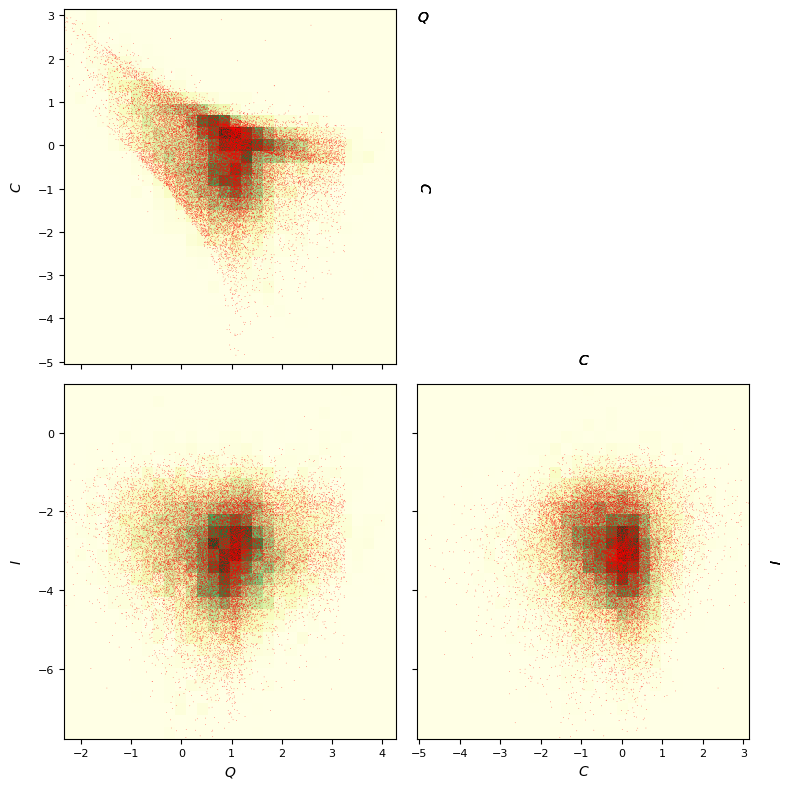

In [24]:
F=mm.FitCMND(Ngauss=5,Nvars=3)
bounds=F.setBounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

Util.elTime(0)
F.fitData(udata,advance=10,bounds=bounds)
Util.elTime()
F.saveFit(f"products/fit-multiple-bound_mus.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plotFit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"products/fit-multiple-bound_mus-{F.prefix}.png")

As you can see the fitting parameter $-\log{\cal L}$ is improved with respect to previous fit. 

You can verify that the fit is capturing the details of the distribution by generating and plotting a mock distribution:

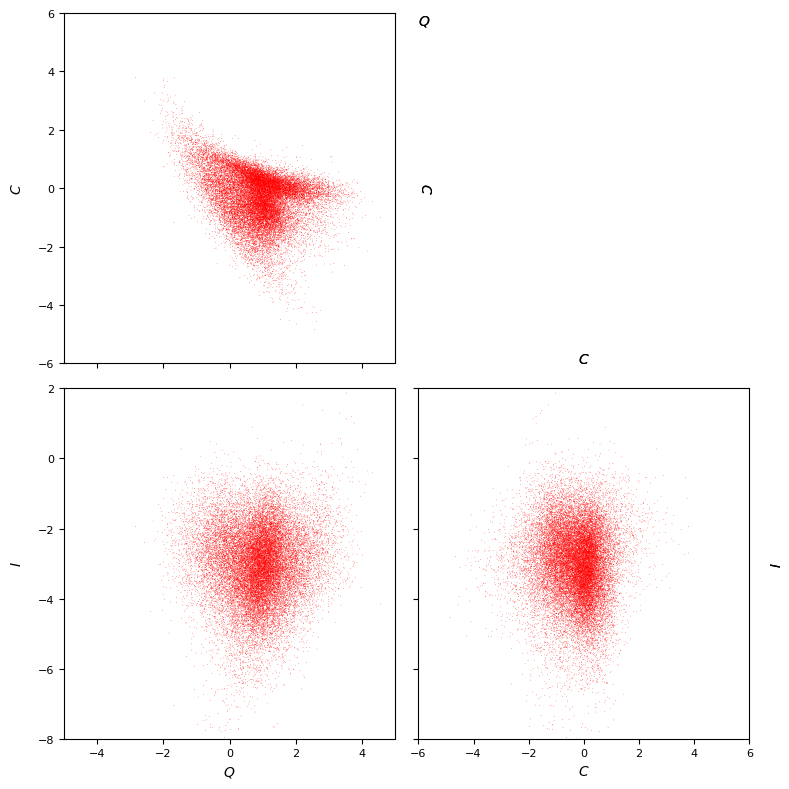

In [25]:
F.cmnd.plotSample(N=len(F.data),
                  figsize=4,
                  props=["Q","C","I"],ranges=[[-5,5],[-6,6],[-8,2]],
                  sargs=dict(s=0.2,edgecolor='None',color='r'))
G.fig.savefig(f"products/sample-multiple-{F.prefix}.png")

Compare this with the original distribution:

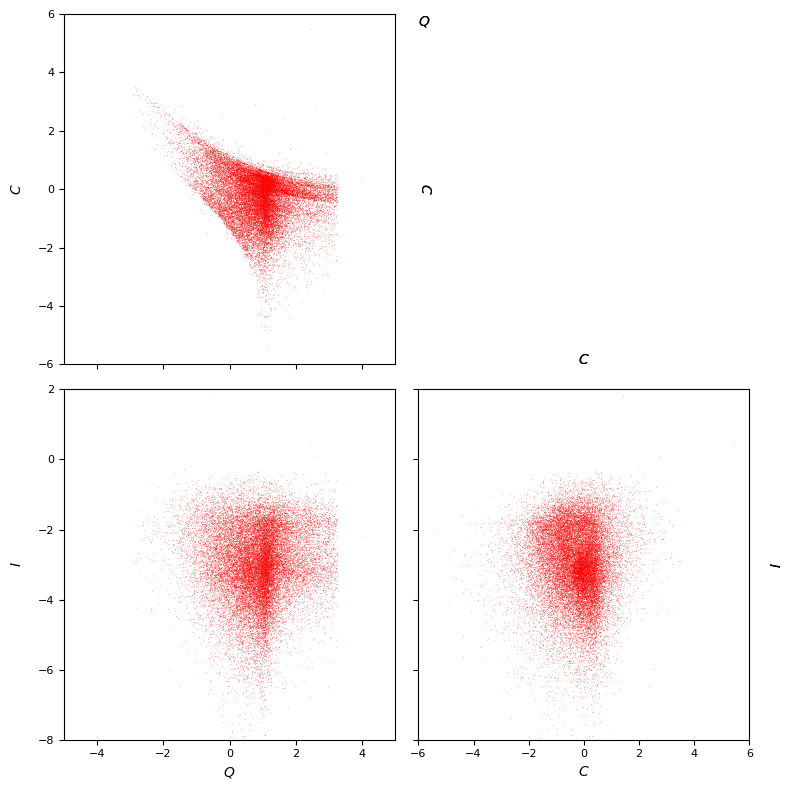

In [26]:
properties=dict(
    Q=dict(label=r"$Q$",range=[-5,5]),
    C=dict(label=r"$C$",range=[-6,6]),
    I=dict(label=r"$I$",range=[-8,2]),
)
G=CornerPlot(properties,figsize=4)
sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatterPlot(udata,**sargs)
G.fig.savefig("products/true-MPCsample.png")

Let's try with 20 MND:

Iterations:
Iter 0:
	Vars: [1.8, 2, 0.53, 2.1, 2.2, 1, -0.4, 2.2, 2.2, 1, 1.8, 2.2, 0.52, 1.8, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.6, 1.8, -1.7, 2.6, 1.8, -1.7, 2.6, 1.8, -1.7, 2.6, 1.8, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.6, 2.6, 1.7, -1.6, 2.6, 1.7, -1.6, 2.5, 1.7, -1.6, 2.5, 1.7, -1.6, 2.5, 1.7, -1.6, 2.5, 1.7, -1.6, 2.5, 1.7, -1.6, 2.5, 1.7, -1.6, -1.4, -1.2, -1.9, -1.4, -1.3, -1.8, -1.4, -1.3, -1.8, -1.4, -1.3, -1.7, -1.4, -1.3, -1.7, -1.4, -1.3, -1.7, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.5, -1.4, -1.3, -1.5, -1.4, -1.3, -1.9, -1.4, -1.4, -1.2, -1.4, -1.3, -3.3, -1.4, -1.4, -1.1, 4.7, 1.6, 1.7, 3.6, 1.8, 2.1, 3.2, 2, 2.3, 2.9, 2.2, 2.4, 2.6, 2.4, 2.4, 2.4, 2.6, 2.3, 2.4, 2.6, 2.3, 2.1, 2.4, 2.1, 1.9, 2.1, 2, 1.8, 1.9, 2, 1.6, 1.7, 1.9, 1.6, 1.7, 1.9, 1.8, 1.8, 1.9, 1.5, 1

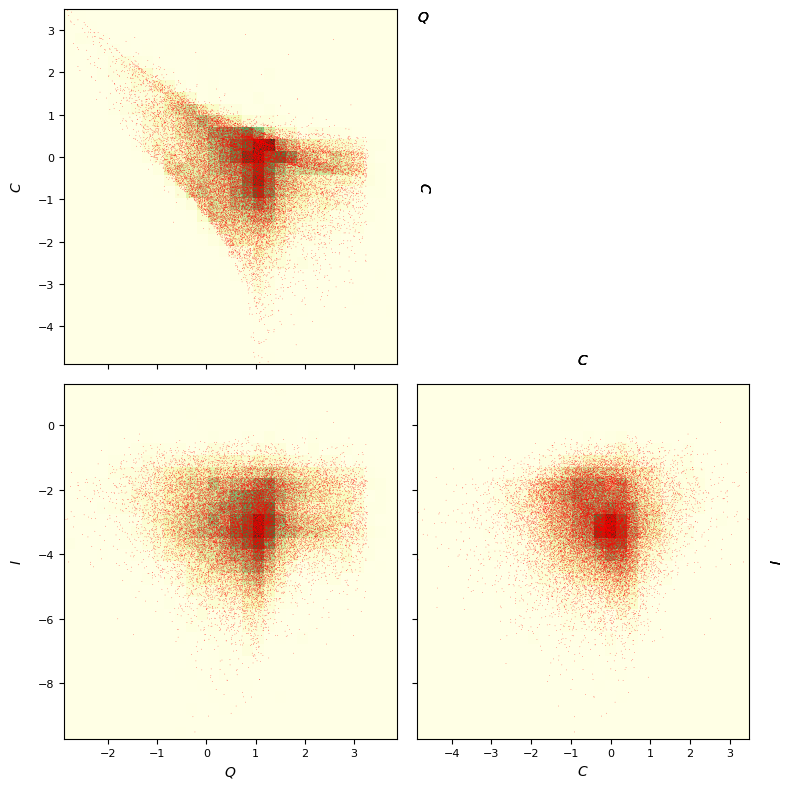

In [27]:
F=mm.FitCMND(Ngauss=20,Nvars=3)
bounds=F.setBounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

Util.elTime(0)
F.fitData(udata,advance=10,bounds=bounds)
Util.elTime()
F.saveFit(f"products/fit-multiple-bound_mus.pkl",useprefix=True)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plotFit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"products/fit-multiple-bound_mus-{F.prefix}.png")

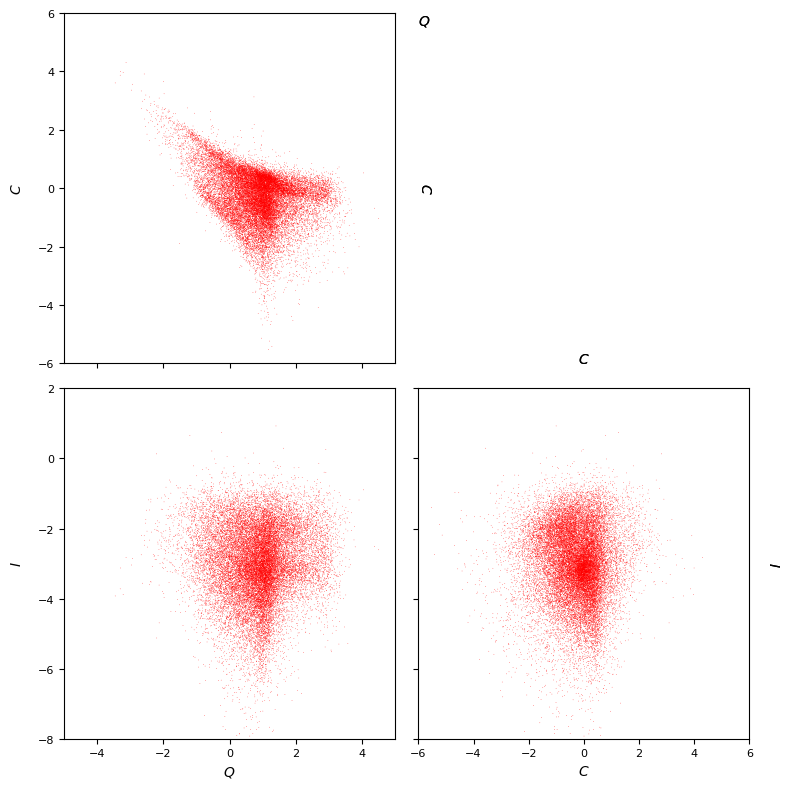

In [28]:
F.cmnd.plotSample(N=len(F.data),
                  figsize=4,
                  props=["Q","C","I"],ranges=[[-5,5],[-6,6],[-8,2]],
                  sargs=dict(s=0.2,edgecolor='None',color='r'))
G.fig.savefig(f"products/sample-multiple-{F.prefix}.png")

---

**MultiNEAs** - Numerical tools for near-earth asteroid dynamics and population

© 2026 Jorge I. Zuluaga and Juanita A. Agudelo